# Agriculture Sector Performance and NPA Analysis

In [1]:
# Loading Appropriate libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC
%matplotlib inline

In [2]:
dfy=pd.read_csv('Yearwise_Agri_data.csv')
dfy.head(5)

,Year,Area,Production,Yield,Rural_Population,Employment,Rainfall,Export_Value,India_GDP,Agriculture_perc_GDP,...,Outstanding_Credit_Perc,Outstanding_Credit_amount,LokSabha_Elections,Arable_Land,Machinery,Fertiliser_Consumption,FDI_amount,PubSB_NPA,PrivSB_NPA,Rainfall_deviation
0,1960,115.58,82.0,710.0,82.08,75.90,1154.8,0.52,37.03,42.56,...,0.0,0.00,No,155.80,NaN,NaN,NaN,0.0,0.0,23
1,1961,117.23,82.7,706.0,81.97,75.35,1399.2,0.55,39.23,41.77,...,0.0,0.00,No,155.80,1.991,NaN,NaN,0.0,0.0,36
2,1962,117.84,80.2,680.0,81.78,74.80,1198.0,0.62,42.16,39.89,...,1.0,0.17,Yes,156.70,2.234,NaN,NaN,0.0,0.0,26
3,1963,117.42,80.6,687.0,81.60,74.10,1220.9,0.74,48.42,41.07,...,2.0,0.40,No,157.47,2.540,NaN,NaN,0.0,0.0,27
4,1964,118.11,89.4,757.0,81.40,73.67,1244.4,0.72,56.48,42.96,...,3.0,0.73,No,157.73,2.790,NaN,NaN,0.0,0.0,28


Undertanding the variables:
    1. Year
    2. Area (in million hectares)
    3. Production (in million tonnes)
    4. Yield (in kg/hectare)
    5. Rural Population (in percentage)
    6. Employment (in percentage)
    7. Rainfall (in mm)
    8. Export Value (in billion USD)
    9. India GDP (in billion USD)
    10. Agriculture percentage in India GDP
    11. Agriculture GDP (in billion USD)
    12. Agriculture Credit Disbursed as percentage of Agriculture GDP
    13. Agriculture Credit Disbursed as amount of Agriculture GDP (in billion USD)
    14. Outstanding Credit as percentage of Agricultural GDP
    15. Outstanding credit as amount of Agricultural GDP (in billion USD)
    16. LokSabha Elections (Yes/No)
    17. Arable Land (in million hectares)
    18. Agricultural machinery, tractors (per 100 sq. km. of arable land)
    19. Fertiliser Consumption (in kg/hectare)
    20. Total FDI amount (billion USD)
    21. Percentage of Agricultural NPAs from Public Sector Banks
    22. Percentage of Agricultural NPAs from Private Sector Banks
    23. Rainfall deviation % from LPA(Long Period Average) used as Draught Indicator
    

In [3]:
dfs=pd.read_csv('Statewise_Agri_data.csv')
dfs.head(5)

,State,Credit_Outstanding,KCC_Loan,PSL,Loan_outstanding_share,Ratio_Crop_loan,Perc_Share_NPA,Perc_Share_credit,SCB_credit,RRB _credit,Coop_Bank_credit,Irrigation
0,Andhra Pradesh.,97,210,550,15.0,7.50,5.5,10.8,80,5,15,1118.27
1,Arunachal Pradesh.,3,0,0,0.2,0.75,0.5,0.4,0,0,0,23.93
2,Assam.,3,0,0,0.2,0.75,1.0,1.3,0,0,0,594.44
3,Bihar.,56,90,120,3.0,0.40,6.5,2.5,60,38,2,1163.66
4,Chhattisgarh.,35,40,50,1.5,0.40,0.5,0.4,67,5,28,272.40


In [4]:
#recognising categorical and numerical features
cat_features = dfy.dtypes[dfy.dtypes == 'object'].index
print('No of categorical fetures:',len(cat_features),'\n')
print(cat_features)
print('*'*100)

num_features = dfy.dtypes[dfy.dtypes != 'object'].index
print('No of numerical fetures:',len(num_features),'\n')
print(num_features)

No of categorical fetures: 1 

Index(['LokSabha_Elections'], dtype='object')
****************************************************************************************************
No of numerical fetures: 22 

Index(['Year', 'Area', 'Production', 'Yield', 'Rural_Population', 'Employment',
       'Rainfall', 'Export_Value', 'India_GDP', 'Agriculture_perc_GDP',
       'Agriculture_GDP', 'Credit_Disbursed_Perc', 'Credit_Disbursed_amount',
       'Outstanding_Credit_Perc', 'Outstanding_Credit_amount', 'Arable_Land',
       'Machinery', 'Fertiliser_Consumption', 'FDI_amount', 'PubSB_NPA',
       'PrivSB_NPA', 'Rainfall_deviation'],
      dtype='object')


Undertanding the variables:
    1. State
    2. Agricultural Credit Outstanding as % of State agriculture GDP
    3. KCC Based Loan(Rs billion)
    4. Private sector Lendings
    5. Percentage of agriculture loan outstanding share
    6. Ratio of Crop loan distbursedto Input Requirements
    7. Percentage Share in agriculture NPA 
    8. Percentage Share agriculture credit outstanding
    9. SCB Total agriculture credit outstanding
    10. RRB Total agriculture credit outstanding
    11. Coop. Bank Total agriculture credit outstanding(2017)
    12. Irrigation Cost 2005-10 (Rs crore)
    13. Rainfall Deviation from LPA % in (2019)


# Exploratory Data Analysis

In [5]:
# Understanding the variables and their types for Yearwise Dataset
dfy.info()
dfy.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 23 columns):
Year                         60 non-null int64
Area                         60 non-null float64
Production                   60 non-null float64
Yield                        60 non-null float64
Rural_Population             60 non-null float64
Employment                   60 non-null float64
Rainfall                     60 non-null float64
Export_Value                 60 non-null float64
India_GDP                    60 non-null float64
Agriculture_perc_GDP         60 non-null float64
Agriculture_GDP              60 non-null float64
Credit_Disbursed_Perc        60 non-null float64
Credit_Disbursed_amount      60 non-null float64
Outstanding_Credit_Perc      60 non-null float64
Outstanding_Credit_amount    60 non-null float64
LokSabha_Elections           60 non-null object
Arable_Land                  60 non-null float64
Machinery                    40 non-null float64
Fertiliser_Consump

,Year,Area,Production,Yield,Rural_Population,Employment,Rainfall,Export_Value,India_GDP,Agriculture_perc_GDP,...,Credit_Disbursed_amount,Outstanding_Credit_Perc,Outstanding_Credit_amount,Arable_Land,Machinery,Fertiliser_Consumption,FDI_amount,PubSB_NPA,PrivSB_NPA,Rainfall_deviation
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,40.000000,15.000000,12.000000,60.000000,60.000000,60.000000
mean,1989.500000,123.318167,166.932333,1349.589667,74.610833,62.757833,1157.346667,8.577833,631.493667,28.805833,...,26.774833,19.616667,38.742667,160.133333,38.091650,148.543467,27.511667,1.236667,0.586667,22.466667
std,17.464249,3.842147,61.165883,486.240340,4.786825,9.663974,103.330041,11.888994,796.254641,9.926208,...,43.529113,13.946437,57.880340,2.566118,36.759074,26.159676,27.282448,2.310915,1.047753,6.980522
min,1960.000000,113.860000,72.400000,629.000000,65.560000,43.210000,935.900000,0.520000,37.030000,14.500000,...,0.000000,0.000000,0.000000,155.800000,1.991000,100.330000,3.920000,0.000000,0.000000,5.000000
25%,1974.750000,121.072500,109.375000,875.000000,71.015000,56.465000,1092.125000,1.597500,99.265000,17.762500,...,1.967500,10.000000,3.925000,157.872500,8.270250,132.005000,9.682500,0.000000,0.000000,18.750000
50%,1989.500000,123.645000,170.450000,1364.500000,74.570000,64.045000,1157.800000,2.750000,283.755000,28.150000,...,5.960000,14.750000,12.075000,160.375000,24.577000,156.490000,14.990000,0.000000,0.000000,23.000000
75%,2004.250000,126.572500,212.975000,1728.750000,78.755000,71.177500,1216.375000,7.550000,736.957500,38.187500,...,21.440000,31.250000,41.065000,162.620000,61.621750,166.655000,40.005000,0.525000,0.425000,27.000000
max,2019.000000,131.160000,284.830000,2233.000000,82.080000,75.900000,1401.400000,42.490000,3202.000000,44.520000,...,153.220000,50.000000,208.940000,163.620000,129.932000,180.750000,81.210000,8.500000,3.100000,36.000000


In [6]:
# Understanding the variables and their types for State-wise Dataset
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
State                     30 non-null object
Credit_Outstanding        30 non-null int64
KCC_Loan                  30 non-null int64
PSL                       30 non-null int64
Loan_outstanding_share    30 non-null float64
Ratio_Crop_loan           30 non-null float64
Perc_Share_NPA            30 non-null float64
Perc_Share_credit         30 non-null float64
SCB_credit                30 non-null int64
RRB _credit               30 non-null int64
Coop_Bank_credit          30 non-null int64
Irrigation                30 non-null float64
dtypes: float64(5), int64(6), object(1)
memory usage: 2.9+ KB


In [7]:
#### Handling categorical variables
# Import label encoder 
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'LokSabha_Elections'. 
dfy['LokSabha_Elections']= label_encoder.fit_transform(dfy['LokSabha_Elections']) 
  
dfy['LokSabha_Elections'].unique() 
dfy['LokSabha_Elections'].head()

0    0
1    0
2    1
3    0
4    0
Name: LokSabha_Elections, dtype: int64

Handling missing values in dataset

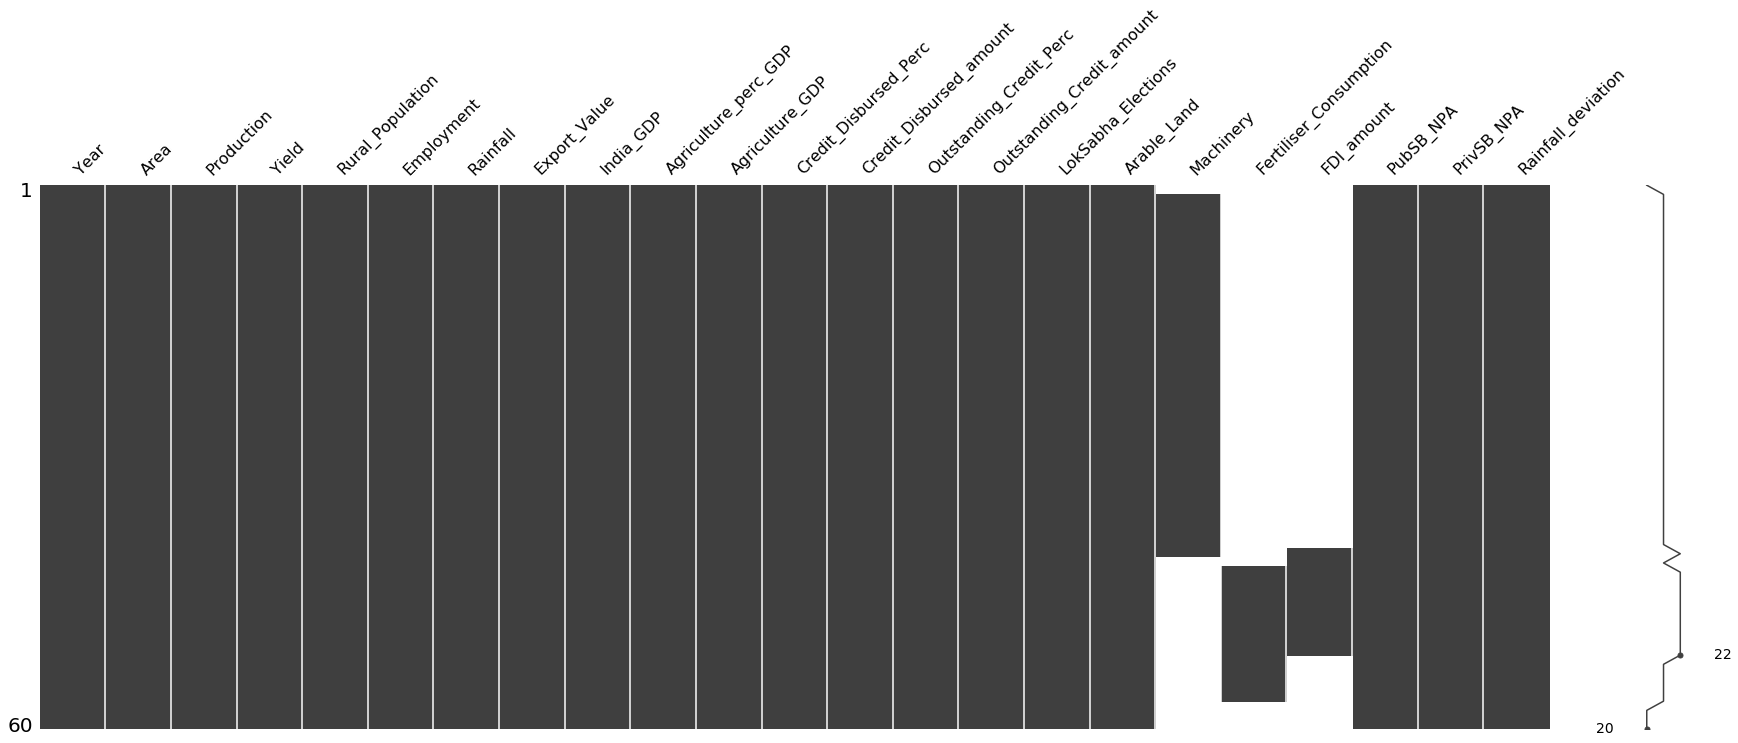

In [8]:
import missingno as msno
msno.matrix(dfy, figsize = (30,10))

In [9]:
#Dropping columns with values less than 20
dfy.drop('Fertiliser_Consumption' , axis=1, inplace=True)
dfy.drop('FDI_amount' , axis=1, inplace=True)

In [10]:
#Imputing missing values with mean value
dfy['Machinery'].fillna(dfy['Machinery'].mean(), inplace = True)
dfy.describe()

,Year,Area,Production,Yield,Rural_Population,Employment,Rainfall,Export_Value,India_GDP,Agriculture_perc_GDP,...,Credit_Disbursed_Perc,Credit_Disbursed_amount,Outstanding_Credit_Perc,Outstanding_Credit_amount,LokSabha_Elections,Arable_Land,Machinery,PubSB_NPA,PrivSB_NPA,Rainfall_deviation
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,1989.500000,123.318167,166.932333,1349.589667,74.610833,62.757833,1157.346667,8.577833,631.493667,28.805833,...,12.458333,26.774833,19.616667,38.742667,0.250000,160.133333,38.091650,1.236667,0.586667,22.466667
std,17.464249,3.842147,61.165883,486.240340,4.786825,9.663974,103.330041,11.888994,796.254641,9.926208,...,10.515240,43.529113,13.946437,57.880340,0.436667,2.566118,29.886211,2.310915,1.047753,6.980522
min,1960.000000,113.860000,72.400000,629.000000,65.560000,43.210000,935.900000,0.520000,37.030000,14.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,155.800000,1.991000,0.000000,0.000000,5.000000
25%,1974.750000,121.072500,109.375000,875.000000,71.015000,56.465000,1092.125000,1.597500,99.265000,17.762500,...,5.500000,1.967500,10.000000,3.925000,0.000000,157.872500,15.127750,0.000000,0.000000,18.750000
50%,1989.500000,123.645000,170.450000,1364.500000,74.570000,64.045000,1157.800000,2.750000,283.755000,28.150000,...,7.500000,5.960000,14.750000,12.075000,0.000000,160.375000,38.091650,0.000000,0.000000,23.000000
75%,2004.250000,126.572500,212.975000,1728.750000,78.755000,71.177500,1216.375000,7.550000,736.957500,38.187500,...,16.250000,21.440000,31.250000,41.065000,0.250000,162.620000,38.496738,0.525000,0.425000,27.000000
max,2019.000000,131.160000,284.830000,2233.000000,82.080000,75.900000,1401.400000,42.490000,3202.000000,44.520000,...,39.000000,153.220000,50.000000,208.940000,1.000000,163.620000,129.932000,8.500000,3.100000,36.000000


In [11]:
dfy['Agriculture_GDP'].describe()

count     60.000000
mean     121.092500
std      117.175887
min       15.760000
25%       37.040000
50%       79.140000
75%      130.862500
max      464.300000
Name: Agriculture_GDP, dtype: float64

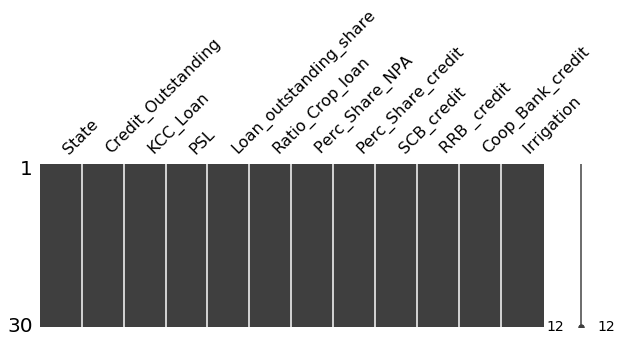

In [12]:
import missingno as msno
msno.matrix(dfs, figsize = (10,3))

Hence there are no missing values in this dataset

# Year-wise Agriculture GDP and NPA Analysis

Finding correlation among features

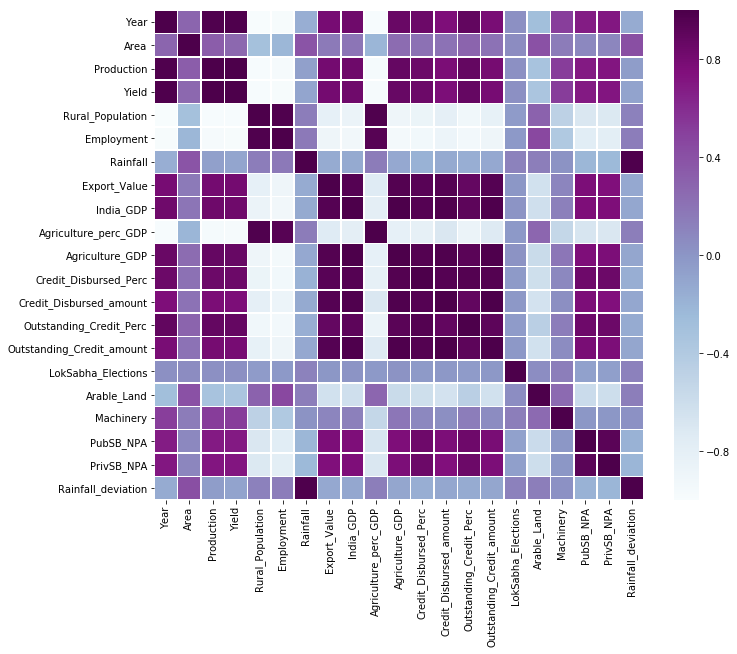

In [13]:
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(dfy.corr(), square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

Hence, it can be observed that there is strong coorelation of Agriculture GDP with following features:

Credit Disbured Amount, 
Outstanding credit amount, 
Export value, Employment, 
Agriculturall Production.

Hence, Analysing the trend of GDP with various features.

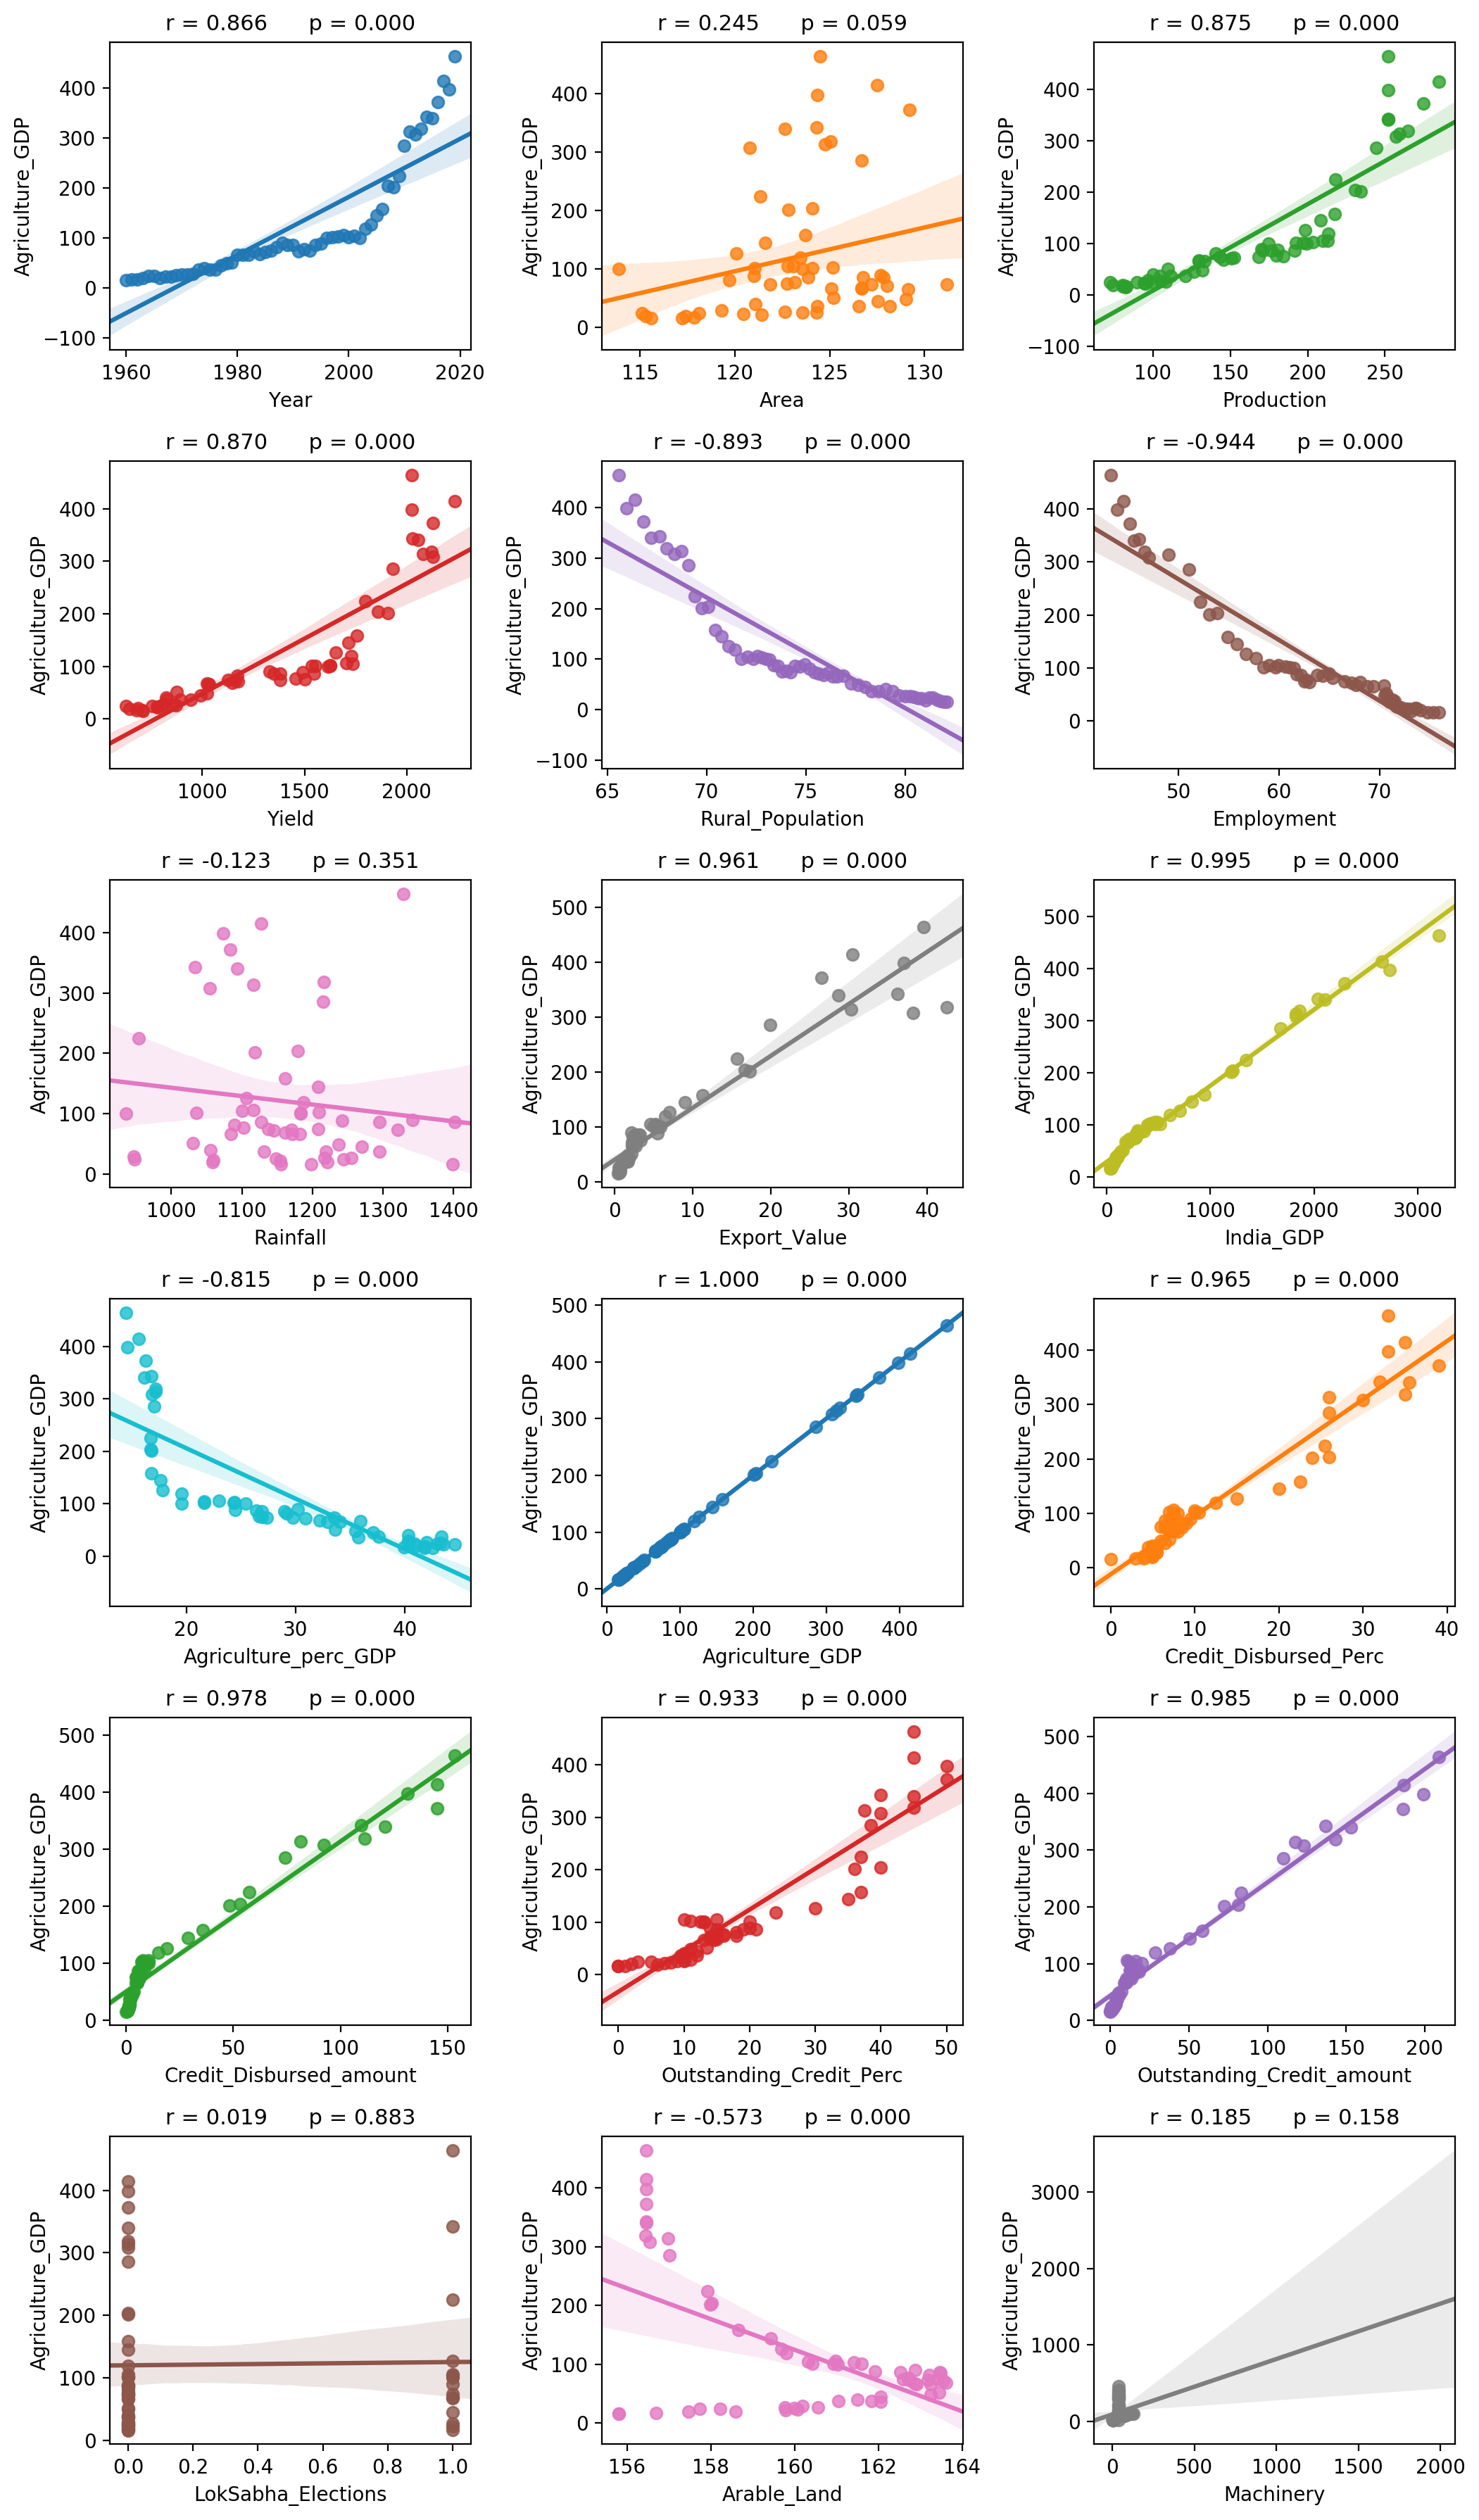

In [14]:
#visualising all the numerical features against price column
num_features = dfy.dtypes[dfy.dtypes != 'object'].index
nr_rows = 6
nr_cols = 3

from scipy import stats

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3),dpi=200)

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(num_features):
            sns.regplot(dfy[num_features[i]], dfy['Agriculture_GDP'], ax = axs[r][c])
            stp = stats.pearsonr(dfy[num_features[i]], dfy['Agriculture_GDP'])
            str_title = "r = " + "{0:.3f}".format(stp[0]) + "      " "p = " + "{0:.3f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   

From the above graph, we can make the following inferences:

1. Production, Yield, Export Value, Credit Disbursed, Outstanding Credit have a strong positive correlation with Agriculture GDP.
2. Rural Population, Employment, Arable Land have a strong negative correlation with Agriculture GDP. 
3. All these variables that have high p value (> 0.05), like Area, Rainfall,   etc have very low correlation with Agriculture GDP, we can say that they will be insignificant in our model building process.

Text(0, 0.5, 'Outstanding credit amount')

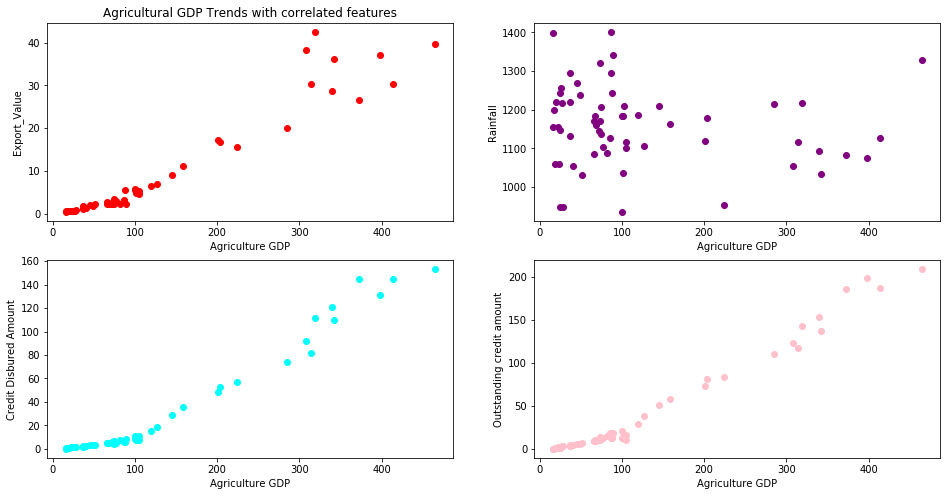

In [15]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.scatter(x=dfy.Agriculture_GDP,y=dfy.Export_Value ,c='red')
plt.xlabel('Agriculture GDP')
plt.ylabel('Export_Value ')
plt.title('Agricultural GDP Trends with correlated features')

plt.subplot(2,2,2)
plt.scatter(x=dfy.Agriculture_GDP,y=dfy.Rainfall,c='purple')
plt.xlabel('Agriculture GDP')
plt.ylabel('Rainfall')

plt.subplot(2,2,3)
plt.scatter(x=dfy.Agriculture_GDP,y=dfy.Credit_Disbursed_amount ,c='cyan')
plt.xlabel('Agriculture GDP')
plt.ylabel('Credit Disbured Amount')

plt.subplot(2,2,4)
plt.scatter(x=dfy.Agriculture_GDP,y=dfy.Outstanding_Credit_amount,c='pink')
plt.xlabel('Agriculture GDP')
plt.ylabel('Outstanding credit amount')

# Credit Disbursed

Text(0.5, 1.0, 'Agriculture GDP vs Credit Disbured Amount')

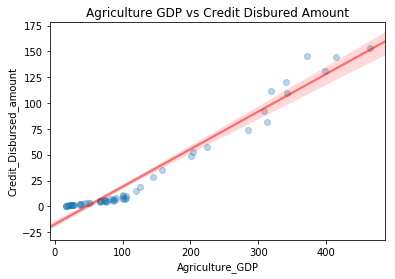

In [16]:
sns.regplot(x = 'Agriculture_GDP', y = 'Credit_Disbursed_amount', data = dfy, scatter_kws=dict(alpha = 0.3), line_kws=dict(color = 'red', alpha = 0.5))
plt.title('Agriculture GDP vs Credit Disbured Amount')

# Outstanding Credit amount

Text(0.5, 0, '')

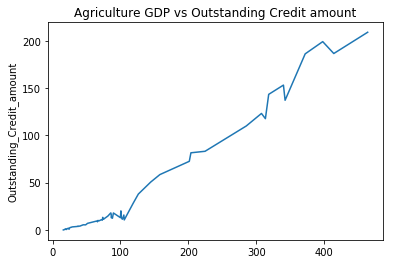

In [17]:
sns.lineplot(x = 'Agriculture_GDP', y = 'Outstanding_Credit_amount', data = dfy)
plt.title('Agriculture GDP vs Outstanding Credit amount')
plt.xlabel('')

Text(0.5, 1.0, 'Yearwise Trends Credit disbured and credit outstanding as a Percentage of Agricultural GDP')

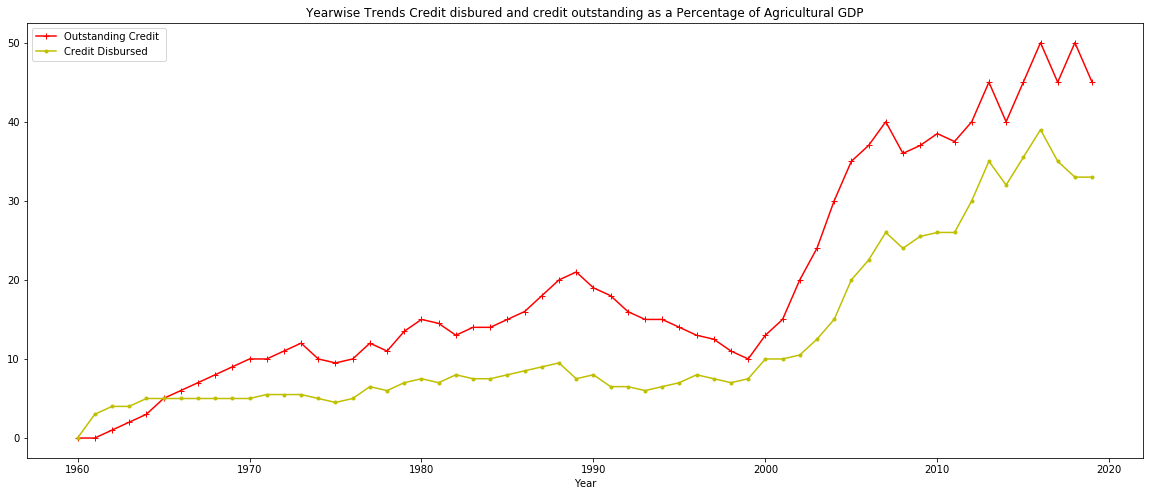

In [18]:
plt.figure(figsize=(20,8))
plt.plot(dfy['Year'], dfy['Outstanding_Credit_Perc'], 'r+-', label='Outstanding Credit ')
plt.plot(dfy['Year'], dfy['Credit_Disbursed_Perc'], 'y.-', label='Credit Disbursed')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.title('Yearwise Trends Credit disbured and credit outstanding as a Percentage of Agricultural GDP')

Reasons for peak rise:

    1969: Nationalisation of SCB's, PSL and Bank Expansion
    1976: RRb's
    1980: Nationalisation of Bank's
    1982: NABARD
    1991: Economic Reforms
    1998: KCC ( Kisan Credit Card ) launched
    2004: GLC and Doubling of Agricultural credit
    2006: Intersest Subvention
    2008: Farm Loan Waiver 
    2014 onwards: State Level farm loan waivers


Text(0.5, 1.0, 'Yearwise Trends of Agricultural GDP and Loan')

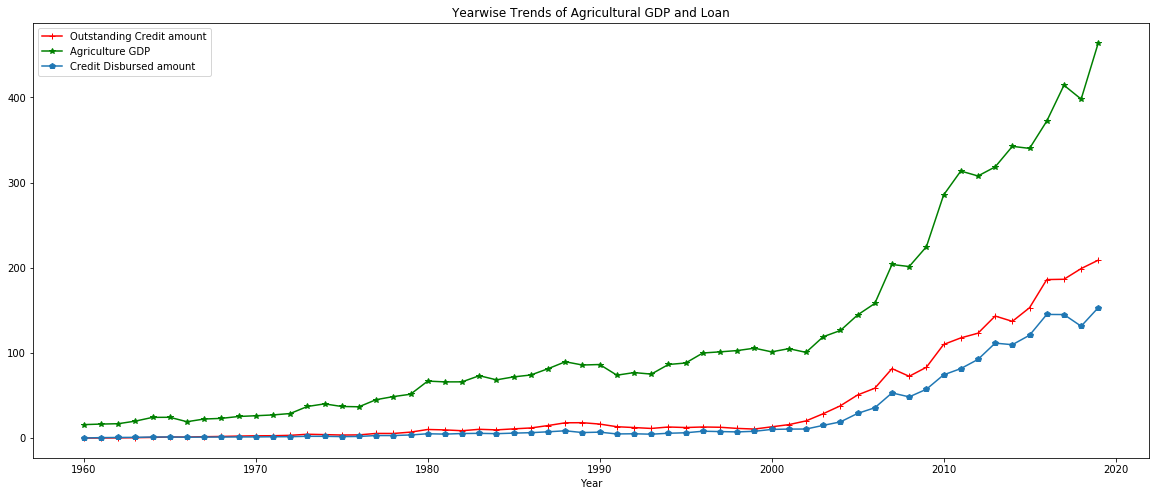

In [19]:
plt.figure(figsize=(20,8))
plt.plot(dfy['Year'], dfy['Outstanding_Credit_amount'], 'r+-', label='Outstanding Credit amount')
plt.plot(dfy['Year'], dfy['Agriculture_GDP'], 'g*-', label='Agriculture GDP')
plt.plot(dfy['Year'], dfy['Credit_Disbursed_amount'], 'p-', label='Credit Disbursed amount')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.title('Yearwise Trends of Agricultural GDP and Loan')

# Rainfall 

Text(0.5, 1.0, 'Agriculture GDP trends with varying rainfall over the time period of 1960 - 2020 ')

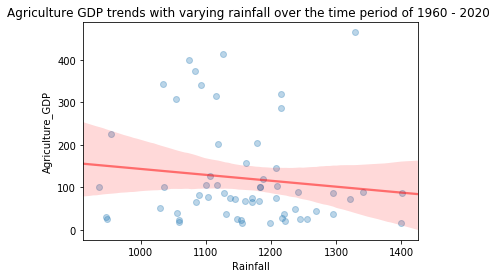

In [20]:
sns.regplot(x = 'Rainfall', y = 'Agriculture_GDP', data = dfy, scatter_kws=dict(alpha = 0.3), line_kws=dict(color = 'red', alpha = 0.5))
plt.title('Agriculture GDP trends with varying rainfall over the time period of 1960 - 2020 ')

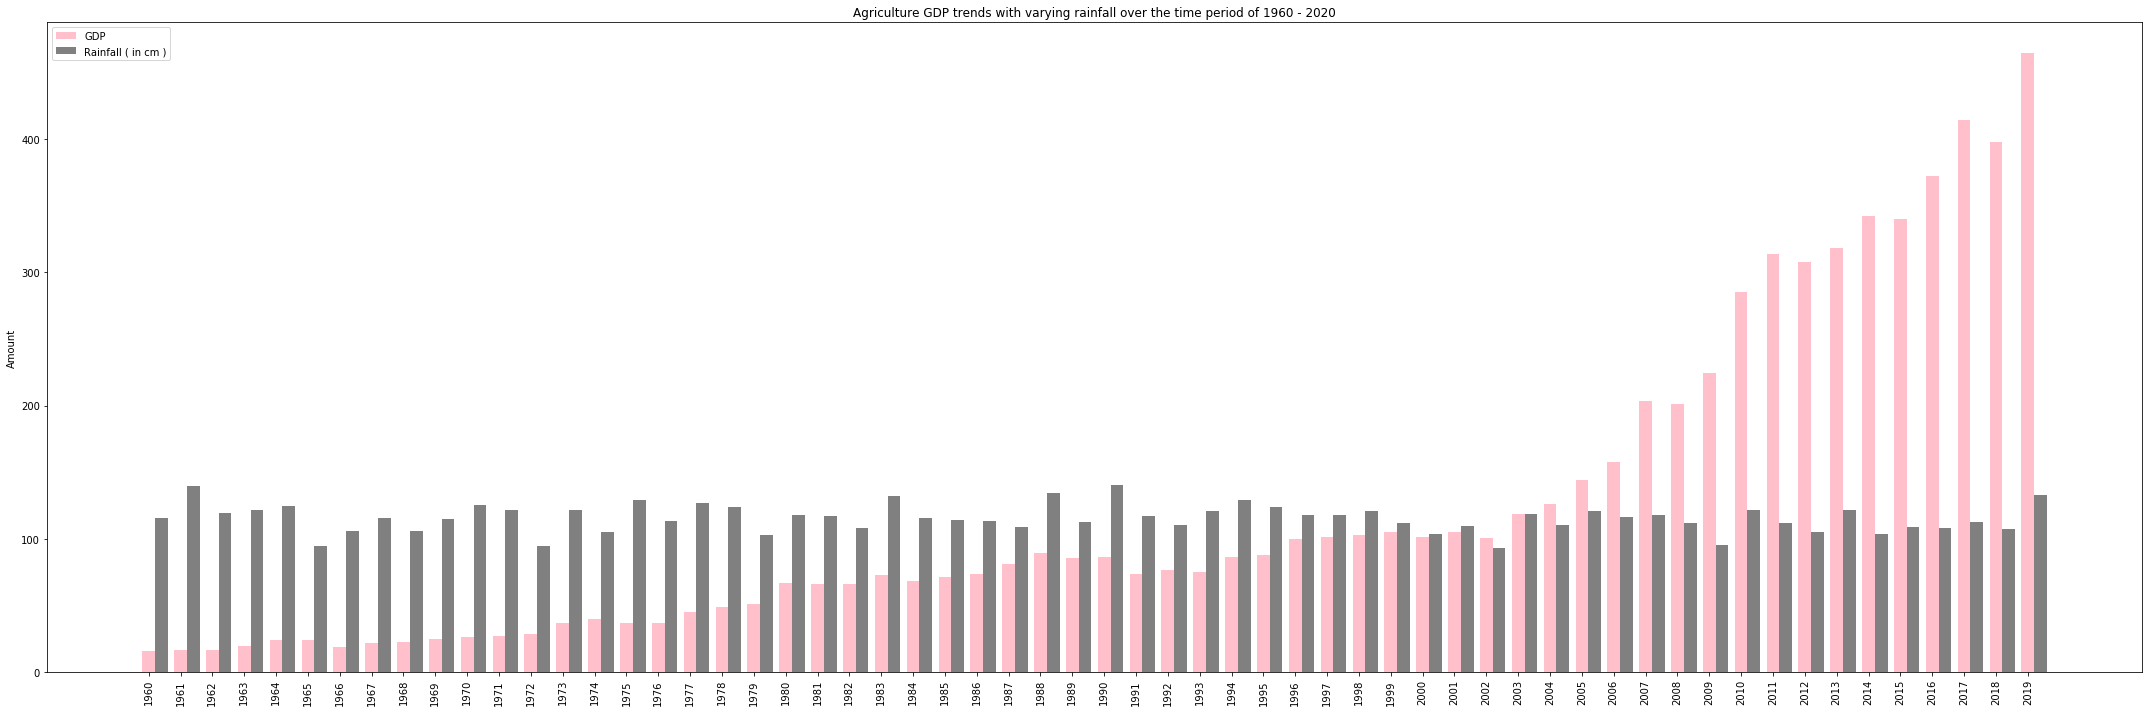

In [21]:


labels = dfy['Year']
x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(30,10))
rects1 = ax.bar(x , dfy['Agriculture_GDP'], width, label='GDP', color = "pink")
rects2 = ax.bar(x + width, dfy['Rainfall']/10 ,width, label='Rainfall ( in cm )', color = "grey")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Amount')
ax.set_title('Agriculture GDP trends with varying rainfall over the time period of 1960 - 2020')
ax.set_xticks(x)
plt.xticks(rotation = 90)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()

plt.show()

# Machinery & Fertilizer Consumption

Text(0, 0.5, 'Machinery')

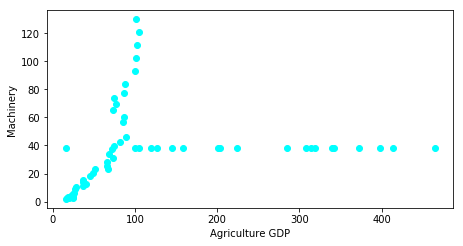

In [22]:
fig, ax = plt.subplots(figsize=(16,8))
plt.subplot(2,2,1)
plt.scatter(x=dfy.Agriculture_GDP,y=dfy.Machinery ,c='cyan')
plt.xlabel('Agriculture GDP')
plt.ylabel('Machinery')


# Area of Land, Production and Yield

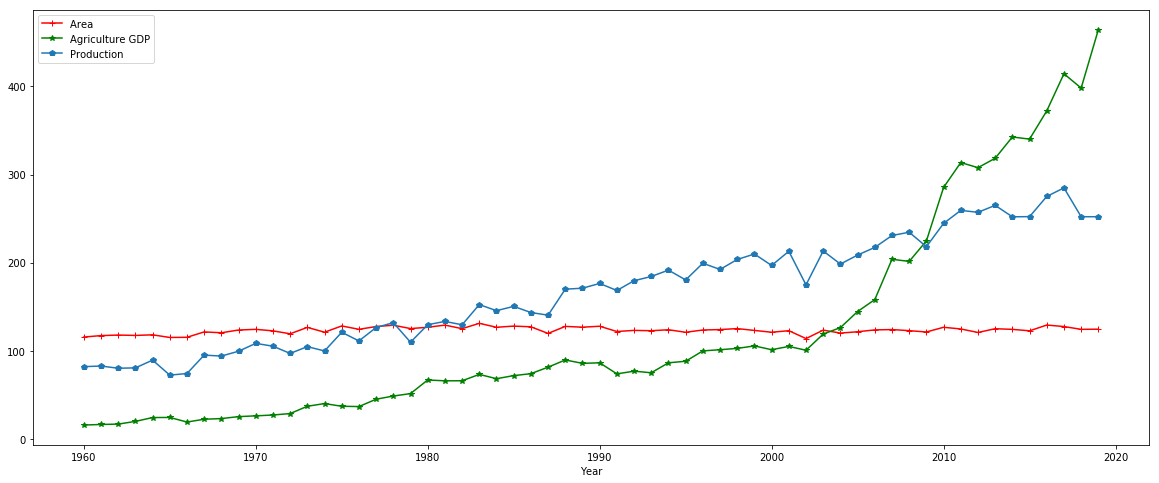

In [23]:
plt.figure(figsize=(20,8))
plt.plot(dfy['Year'], dfy['Area'], 'r+-', label='Area ')
plt.plot(dfy['Year'], dfy['Agriculture_GDP'], 'g*-', label='Agriculture GDP')
plt.plot(dfy['Year'], dfy['Production'], 'p-', label='Production')
#plt.plot(dfy['Year'], dfy['Yield'], 'p-', label='Yield')


plt.xlabel('Year')
plt.legend(loc='upper left')

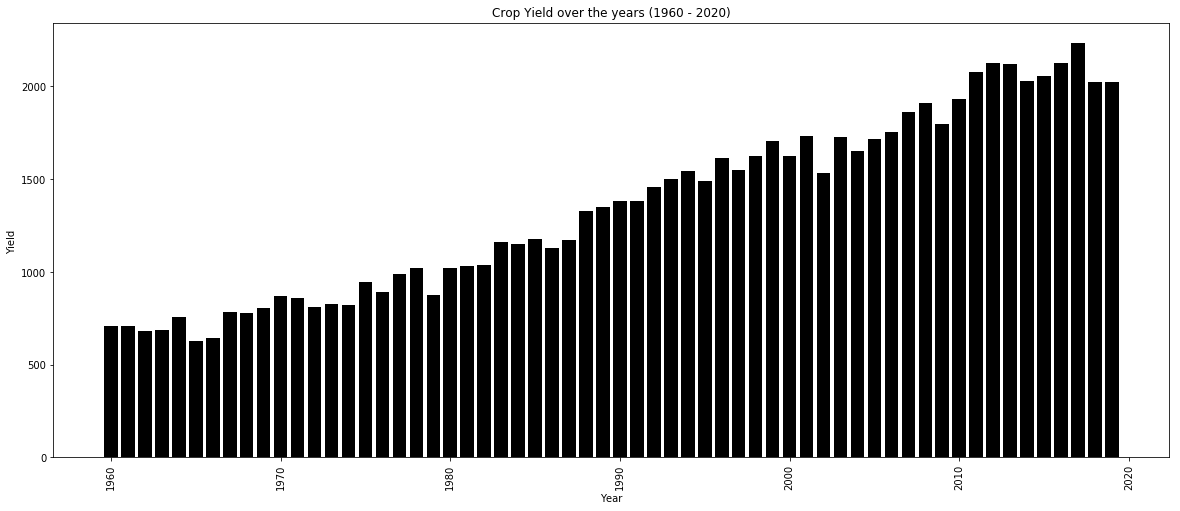

In [24]:
plt.figure(figsize=(20,8))
plt.bar(dfy['Year'], dfy['Yield'], data = dfy, color = "black")
plt.xlabel("Year")
plt.xticks(rotation = 90)
plt.ylabel("Yield ")
plt.title("Crop Yield over the years (1960 - 2020)")
plt.show()

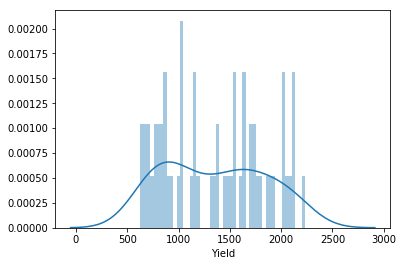

In [25]:
sns.distplot(dfy['Yield'], bins=50)
plt.show()

# Population and Employment

Text(0.5, 1.0, 'Yearwise Trends')

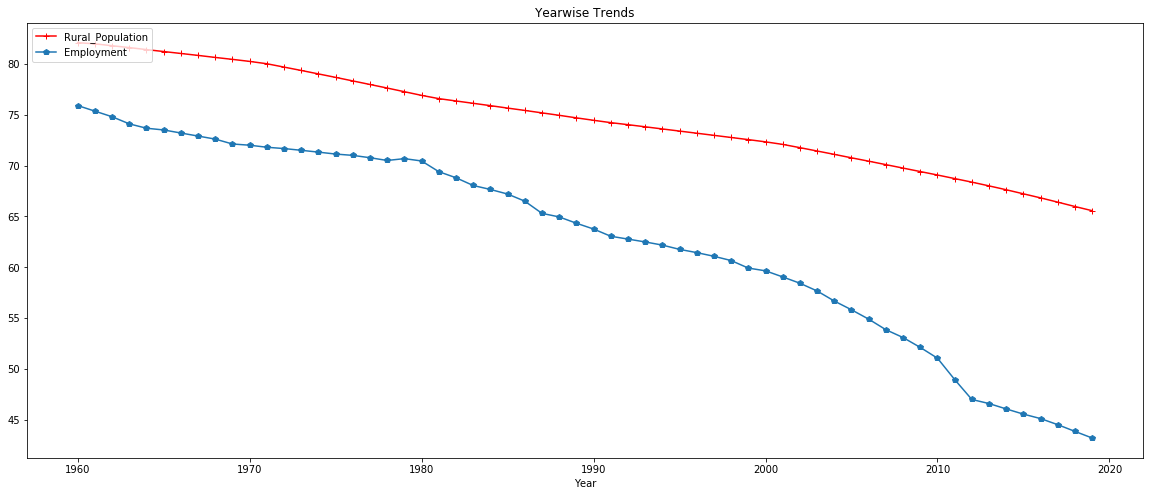

In [26]:
plt.figure(figsize=(20,8))
plt.plot(dfy['Year'], dfy['Rural_Population'], 'r+-', label='Rural_Population')
plt.plot(dfy['Year'], dfy['Employment'], 'p-', label='Employment')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.title('Yearwise Trends')


# Export Value

Text(0.5, 1.0, 'Agriculture GDP vs Export value')

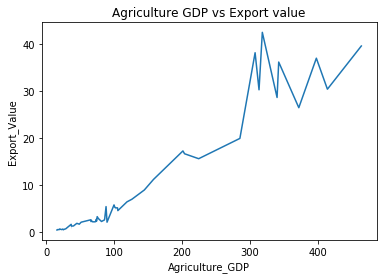

In [27]:
sns.lineplot(x = 'Agriculture_GDP', y = 'Export_Value', data = dfy)
plt.title('Agriculture GDP vs Export value')

# Elections

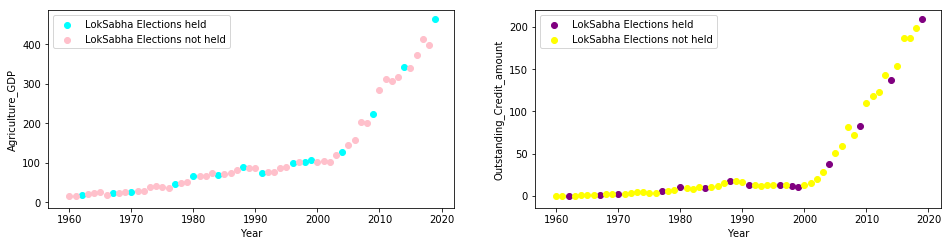

In [28]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.scatter(x=dfy.Year[dfy.LokSabha_Elections==1],y=dfy.Agriculture_GDP[dfy.LokSabha_Elections==1],c='cyan')
plt.scatter(x=dfy.Year[dfy.LokSabha_Elections==0],y=dfy.Agriculture_GDP[dfy.LokSabha_Elections==0],c='pink')
plt.xlabel('Year')
plt.ylabel('Agriculture_GDP')
plt.legend(['LokSabha Elections held','LokSabha Elections not held'])
#plt.title('HR Attrition for Different Ages based on Total Working Years')


plt.subplot(2,2,2)
plt.scatter(x=dfy.Year[dfy.LokSabha_Elections==1],y=dfy.Outstanding_Credit_amount[dfy.LokSabha_Elections==1],c='purple')
plt.scatter(x=dfy.Year[dfy.LokSabha_Elections==0],y=dfy.Outstanding_Credit_amount[dfy.LokSabha_Elections==0],c='yellow')
plt.xlabel('Year')
plt.ylabel('Outstanding_Credit_amount')
plt.legend(['LokSabha Elections held','LokSabha Elections not held'])

# NPA Trends for different Banks

Text(0.5, 1.0, 'Yearwise Trends of Agricultural NPA of Different types of Banks from 2004 - 2020')

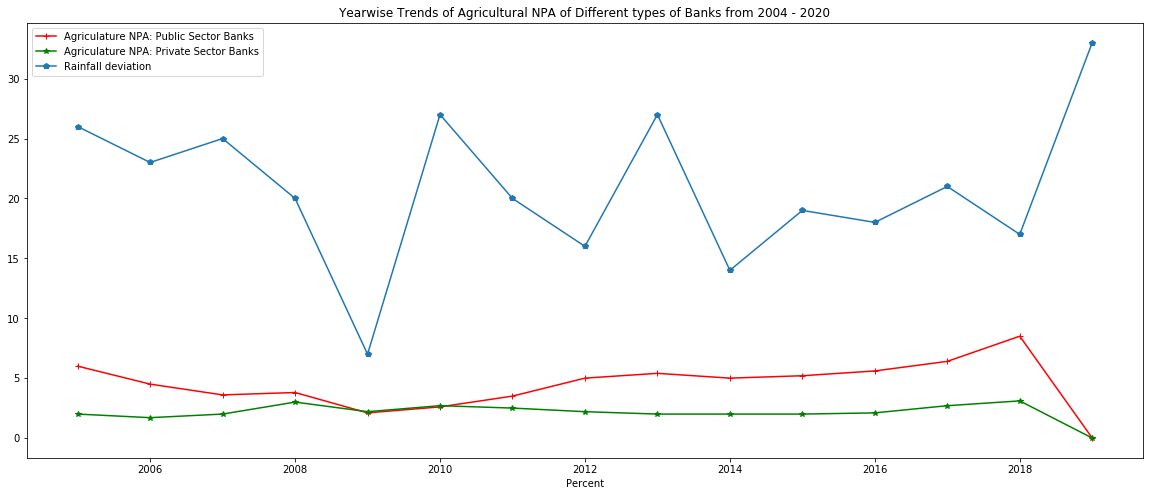

In [29]:
result_dfy=dfy[dfy['Year']>2004]

plt.figure(figsize=(20,8))
plt.plot(result_dfy['Year'], result_dfy['PubSB_NPA'], 'r+-', label='Agriculature NPA: Public Sector Banks')
plt.plot(result_dfy['Year'], result_dfy['PrivSB_NPA'], 'g*-', label='Agriculature NPA: Private Sector Banks')
plt.plot(result_dfy['Year'], result_dfy['Rainfall_deviation'], 'p-', label='Rainfall deviation')
plt.xlabel('Year')
plt.xlabel('Percent')
plt.legend(loc='upper left')
plt.title('Yearwise Trends of Agricultural NPA of Different types of Banks from 2004 - 2020')

# State-wise Agriculture GDP and NPA Analysis

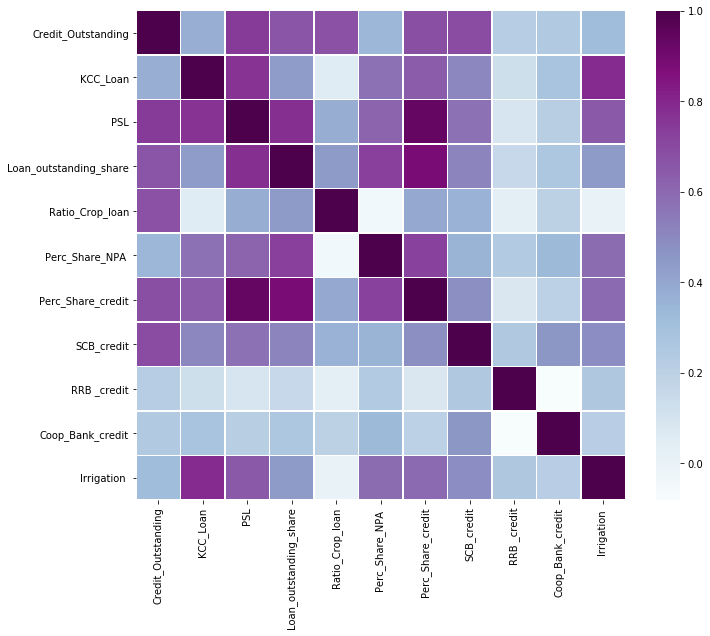

In [30]:
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(dfs.corr(), square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

Statewise coorelation among various features

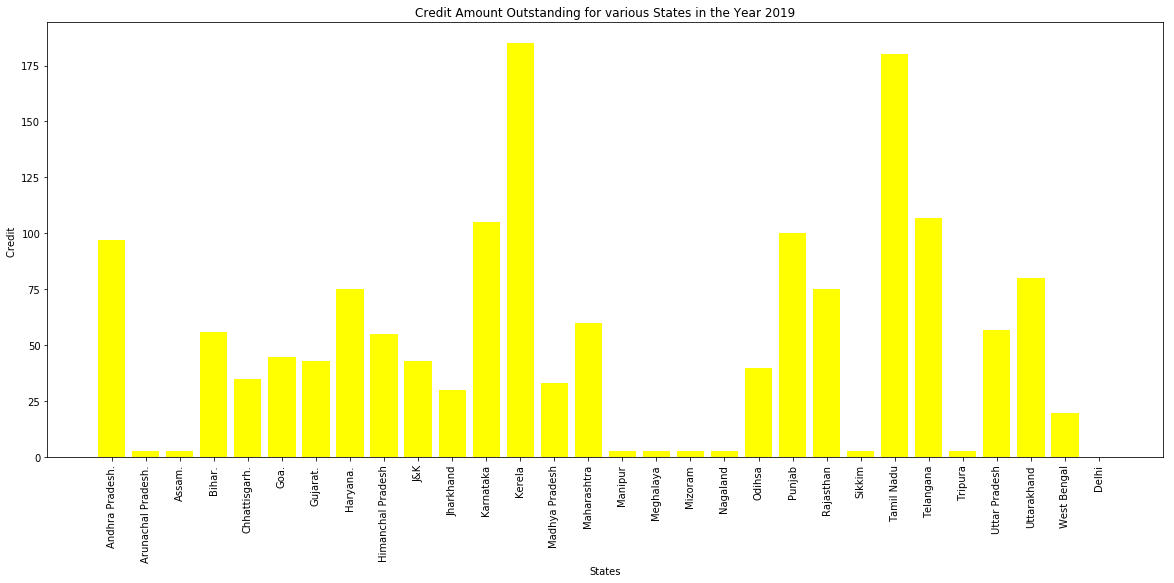

In [31]:
plt.figure(figsize=(20,8))
plt.bar(dfs['State'], dfs['Credit_Outstanding'], data = dfs, color = "yellow")
plt.xlabel("States")
plt.xticks(rotation = 90)
plt.ylabel("Credit ")
plt.title("Credit Amount Outstanding for various States in the Year 2019")
plt.show()

Hence, we can see that maximum amount of Outstanding credit / bad loans are generated in the states of Kerela and Tamil Nadu

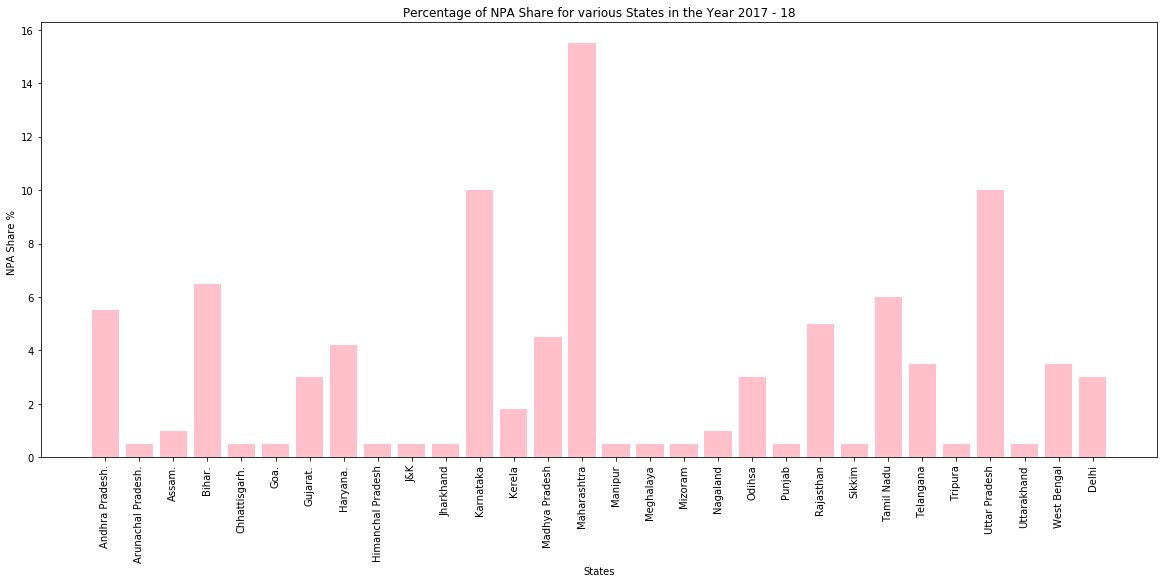

In [32]:
plt.figure(figsize=(20,8))
plt.bar(dfs['State'], dfs['Perc_Share_NPA '], data = dfs, color = "pink")
plt.xlabel("States")
plt.xticks(rotation = 90)
plt.ylabel("NPA Share % ")
plt.title("Percentage of NPA Share for various States in the Year 2017 - 18")
plt.show()

Hence, we can see that maximum amount of NPA share are from the states of Mahrashtra, Karnataka and Uttar Pradesh

Text(0.5, 1.0, 'Statewise Trends credit outstanding ')

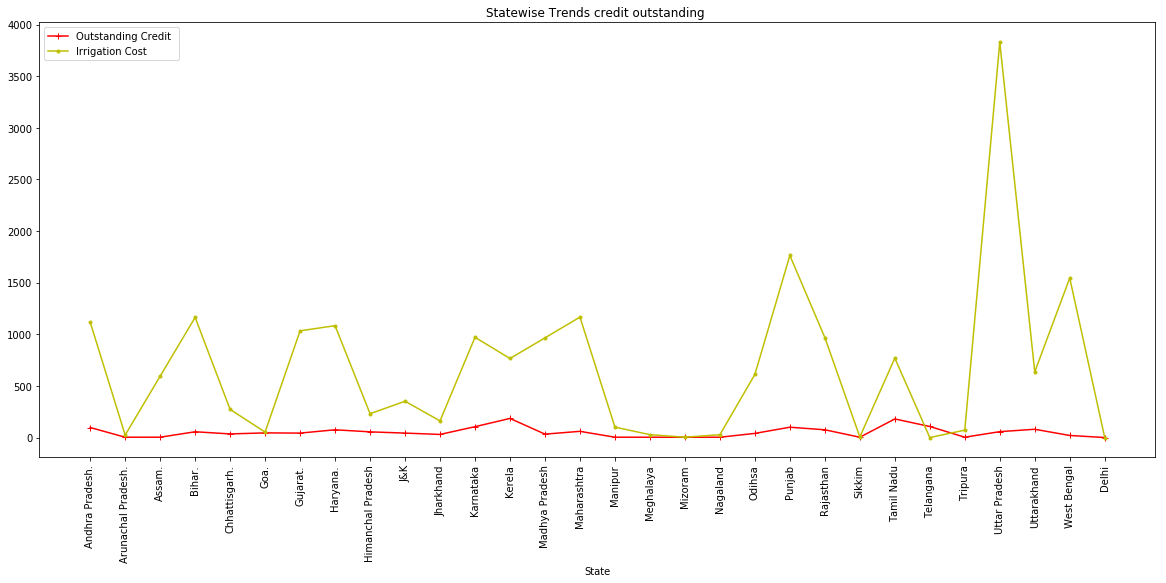

In [33]:
plt.figure(figsize=(20,8))
plt.plot(dfs['State'], dfs['Credit_Outstanding'], 'r+-', label='Outstanding Credit ')
plt.plot(dfs['State'], dfs['Irrigation '], 'y.-', label='Irrigation Cost')
plt.xlabel('State')
plt.legend(loc='upper left')
plt.xticks(rotation = 90)
plt.title('Statewise Trends credit outstanding ')

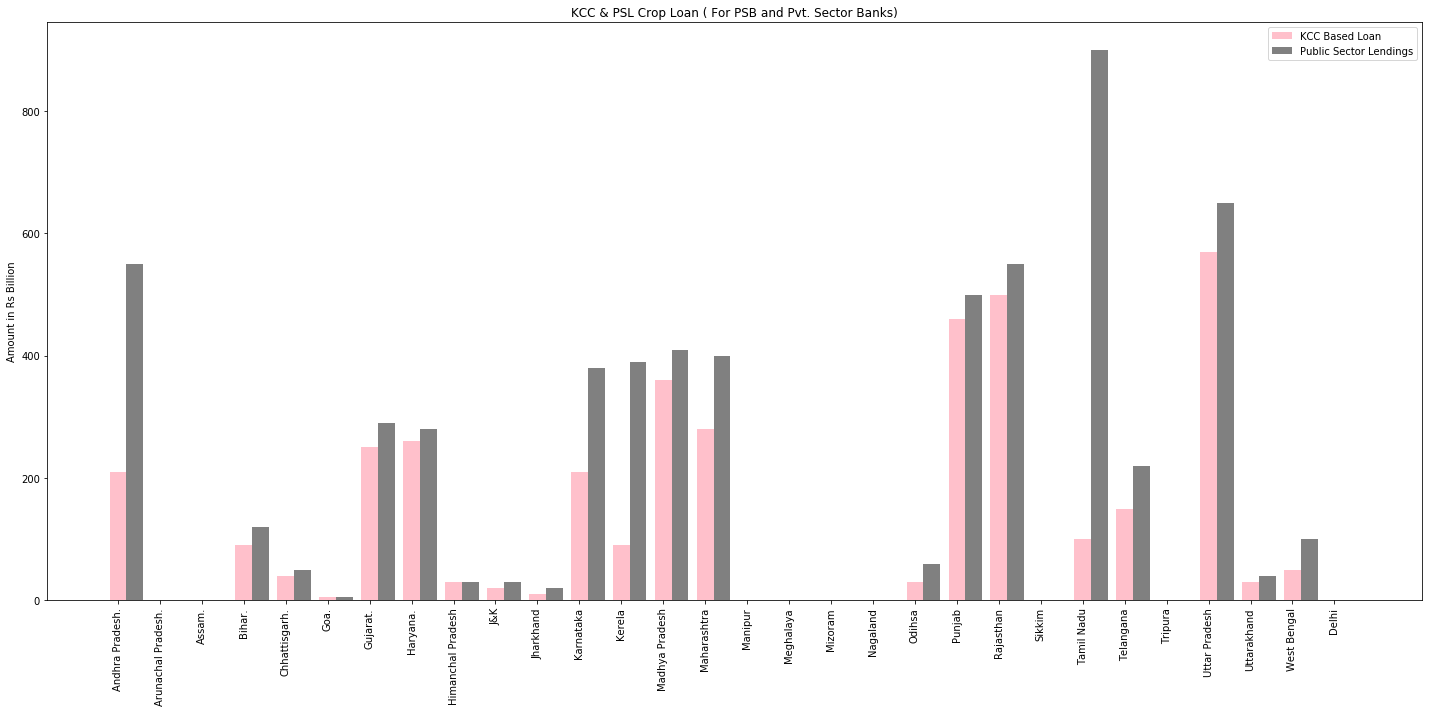

In [34]:
labels = dfs['State']
x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x , dfs['KCC_Loan'], width, label='KCC Based Loan', color = "pink")
rects2 = ax.bar(x + width, dfs['PSL'],width, label='Public Sector Lendings', color = "grey")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Amount in Rs Billion')
ax.set_title('KCC & PSL Crop Loan ( For PSB and Pvt. Sector Banks)')
ax.set_xticks(x)
plt.xticks(rotation = 90)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()

plt.show()

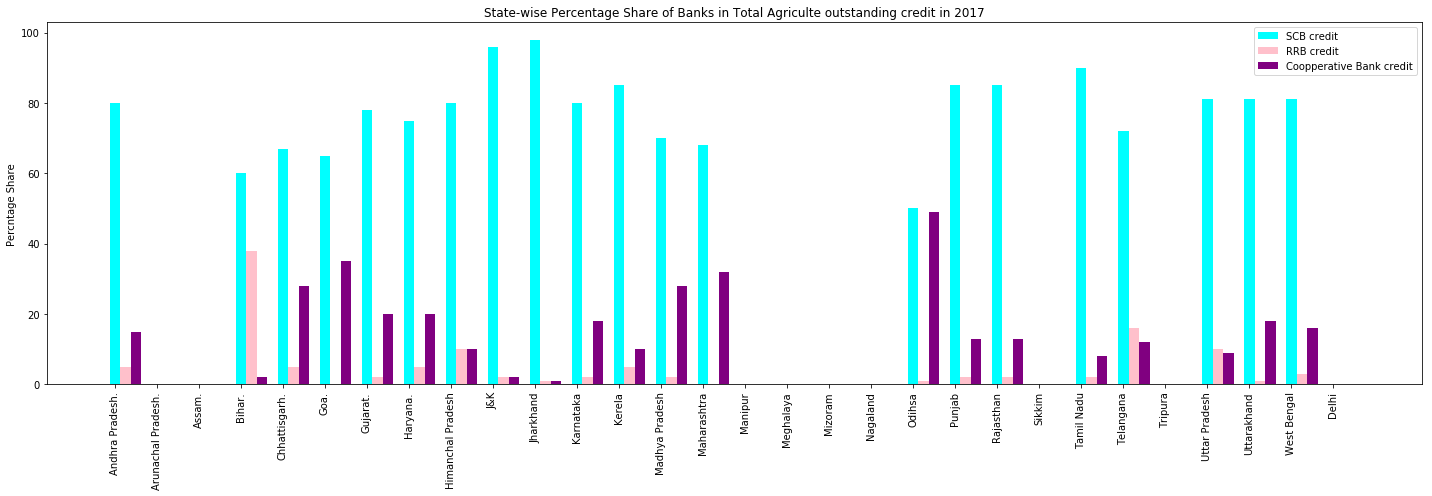

In [35]:
labels = dfs['State']
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(20,7))
rects1 = ax.bar(x , dfs['SCB_credit'], width, label='SCB credit',color = "cyan")
rects2 = ax.bar(x + width, dfs['RRB _credit'],width, label='RRB credit',color = "pink")
rects3 = ax.bar(x + (2*width), dfs['Coop_Bank_credit'],width, label='Coopperative Bank credit',color = "purple")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percntage Share')
ax.set_title('State-wise Percentage Share of Banks in Total Agriculte outstanding credit in 2017')
ax.set_xticks(x)
plt.xticks(rotation = 90)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()

plt.show()

# Prediction using Multiple Linear Regression

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
df_train, df_test = train_test_split(dfy, test_size=0.3, random_state=42)
print(df_train.shape)
print(df_test.shape)

(42, 21)
(18, 21)


# Feature scaling

Here we will scale full dataframe using MinMax scaler

In [38]:
cols = df_train.columns

In [39]:
#importing minmax scaler from sklearn.preprocessing and scaling the training dataframe
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-3,3))
df_train[cols] = scaler.fit_transform(df_train[cols])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [40]:
#transforming the test data set
df_test[cols] = scaler.transform(df_test[cols])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [41]:
#checking minmax scaling
df_train.describe()

,Year,Area,Production,Yield,Rural_Population,Employment,Rainfall,Export_Value,India_GDP,Agriculture_perc_GDP,...,Credit_Disbursed_Perc,Credit_Disbursed_amount,Outstanding_Credit_Perc,Outstanding_Credit_amount,LokSabha_Elections,Arable_Land,Machinery,PubSB_NPA,PrivSB_NPA,Rainfall_deviation
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,...,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,-0.014778,0.502973,-0.313478,-0.226030,0.273091,0.680194,0.000307,-1.942878,-1.933000,-0.184496,...,-1.511905,-2.042231,-0.704286,-1.952974,-1.428571,0.682864,-1.201009,-2.312605,-2.129032,0.525346
std,1.684647,1.249901,1.715441,1.849635,1.636991,1.716139,1.363215,1.649265,1.494593,1.846245,...,1.690237,1.704549,1.605549,1.674092,2.670004,1.968875,1.479208,1.553572,1.853619,1.335163
min,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,...,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000
25%,-1.215517,-0.273988,-1.678621,-1.826087,-0.703839,-0.129745,-0.869388,-2.811874,-2.806655,-1.883245,...,-2.479167,-2.897859,-1.770000,-2.834953,-3.000000,-0.978261,-2.101766,-3.000000,-3.000000,-0.290323
50%,-0.155172,0.584393,-0.221795,-0.267081,0.383912,1.000622,-0.145005,-2.695279,-2.520240,-0.086942,...,-2.250000,-2.774504,-1.230000,-2.653250,-3.000000,1.135550,-1.307002,-3.000000,-3.000000,0.483871
75%,1.215517,1.442775,0.941819,1.186335,1.376600,2.119788,0.818153,-2.275036,-2.111535,1.233178,...,-1.770833,-2.604989,-0.510000,-2.437374,1.500000,2.420716,-1.124440,-3.000000,-3.000000,1.403226
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


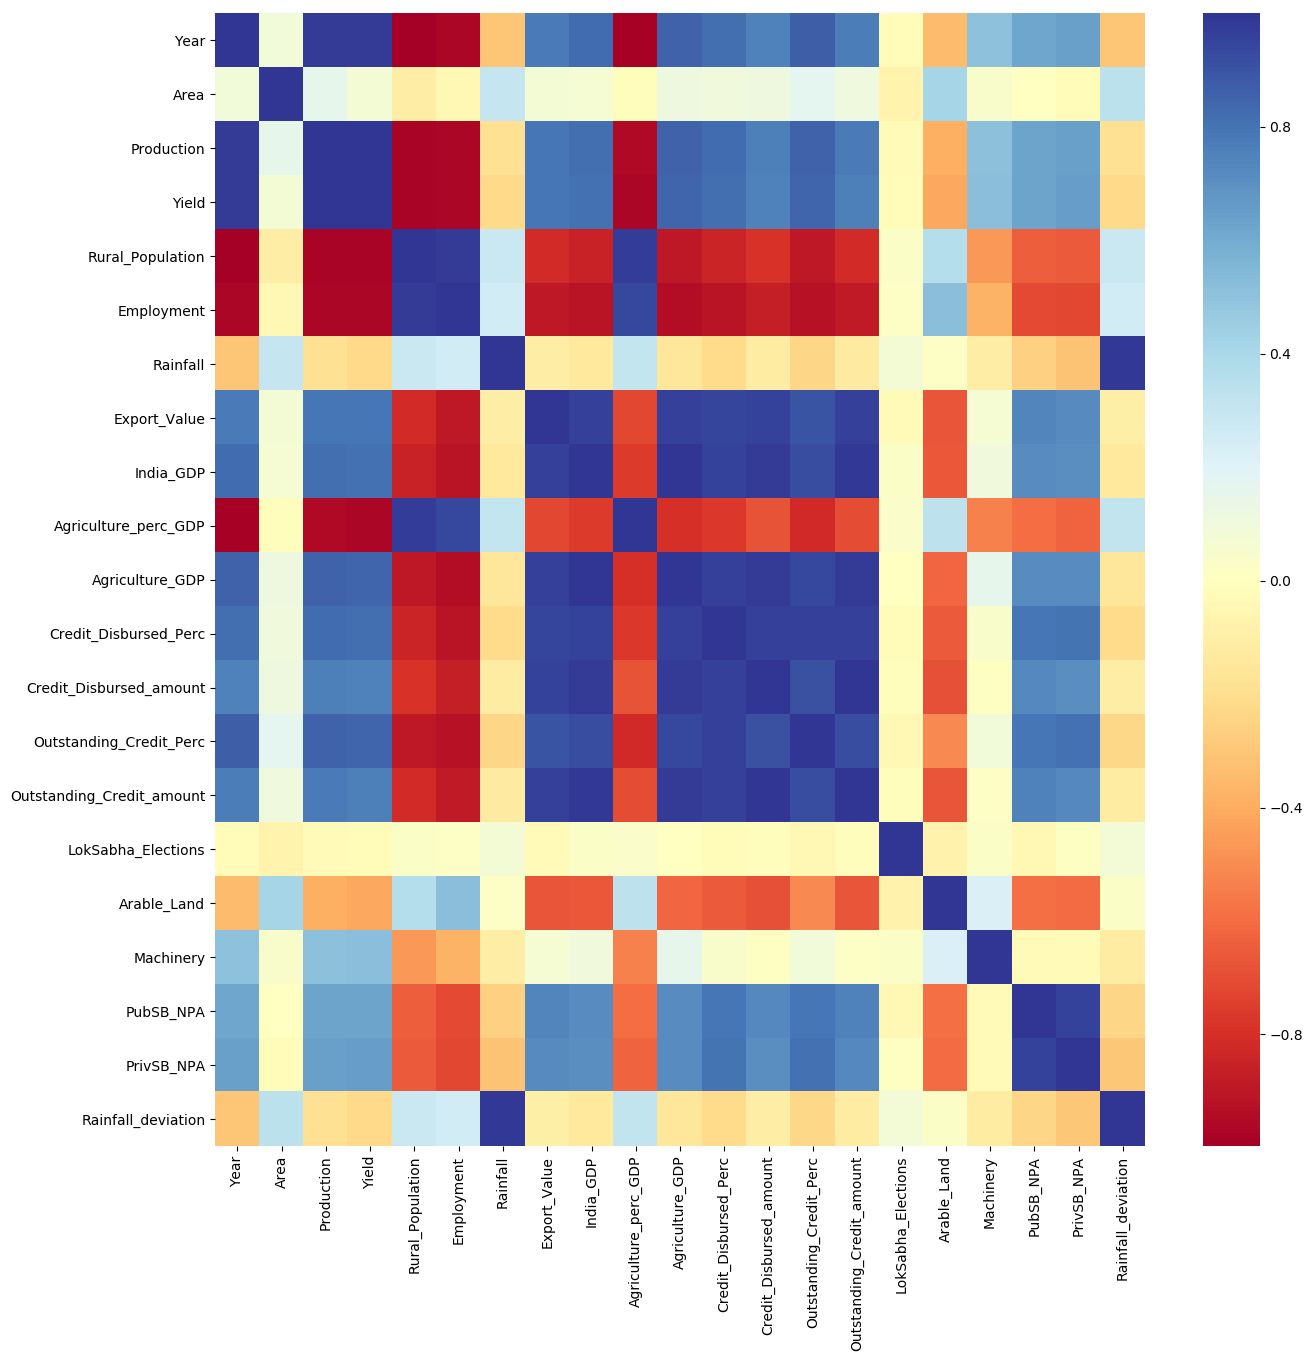

In [42]:
#checking correlation of train dataframe 
plt.figure(figsize=(15,15),dpi=100)
sns.heatmap(df_train.corr(), cmap='RdYlBu')
plt.show()

In [43]:
#creating function for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [44]:
#creating X and y variables
y_train = df_train.pop('Agriculture_GDP')
X_train = df_train

 # Model Building for Agriculture GDP

In [46]:
#feature selection using RFE
#In this case we are have 22 features , lets select 20 features from the data using RFE and then we will 
# remove statistical insignificant variables one by one

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

rfe = RFE(lr,10)
rfe.fit(X_train,y_train)

print(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
print('*'*100)
cols_rfe = X_train.columns[rfe.support_]
print('Features with RFE support:')
print(cols_rfe)
print('*'*100)
print('Features without RFE support:')
cols_not_rfe = X_train.columns[~rfe.support_]
print(cols_not_rfe)

[('Year', True, 1), ('Area', False, 3), ('Production', True, 1), ('Yield', False, 2), ('Rural_Population', True, 1), ('Employment', False, 7), ('Rainfall', False, 8), ('Export_Value', True, 1), ('India_GDP', True, 1), ('Agriculture_perc_GDP', True, 1), ('Credit_Disbursed_Perc', False, 5), ('Credit_Disbursed_amount', True, 1), ('Outstanding_Credit_Perc', False, 4), ('Outstanding_Credit_amount', True, 1), ('LokSabha_Elections', False, 11), ('Arable_Land', False, 6), ('Machinery', False, 10), ('PubSB_NPA', True, 1), ('PrivSB_NPA', True, 1), ('Rainfall_deviation', False, 9)]
****************************************************************************************************
Features with RFE support:
Index(['Year', 'Production', 'Rural_Population', 'Export_Value', 'India_GDP',
       'Agriculture_perc_GDP', 'Credit_Disbursed_amount',
       'Outstanding_Credit_amount', 'PubSB_NPA', 'PrivSB_NPA'],
      dtype='object')
************************************************************************

In [47]:
import statsmodels.api as sm 

In [48]:
#Building the first model
X_train_lr = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train,X_train_lr).fit()
print(lr_1.summary())
print(vif(X_train))

                            OLS Regression Results                            
Dep. Variable:        Agriculture_GDP   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1632.
Date:                Sun, 17 May 2020   Prob (F-statistic):           3.80e-29
Time:                        19:38:27   Log-Likelihood:                 77.683
No. Observations:                  42   AIC:                            -113.4
Df Residuals:                      21   BIC:                            -76.87
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [49]:
#removing features having p-value  and building 2nd model
X_train.drop('PrivSB_NPA' , axis=1, inplace=True)
X_train.drop('PubSB_NPA', axis=1, inplace=True)
X_train.drop('Arable_Land' , axis=1, inplace=True)
X_train.drop('Rainfall_deviation' , axis=1, inplace=True)

X_train_lr = sm.add_constant(X_train)
lr_2 = sm.OLS(y_train,X_train_lr).fit()
print(lr_2.summary())
print(vif(X_train))

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:        Agriculture_GDP   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1642.
Date:                Sun, 17 May 2020   Prob (F-statistic):           1.05e-33
Time:                        19:38:28   Log-Likelihood:                 69.465
No. Observations:                  42   AIC:                            -104.9
Df Residuals:                      25   BIC:                            -75.39
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [50]:
#removing 'Yield' feature as it is having high VIF building 3rd model
X_train.drop('Yield', axis=1, inplace=True)
X_train_lr = sm.add_constant(X_train)
lr_3 = sm.OLS(y_train,X_train_lr).fit()
print(lr_3.summary())
print(vif(X_train))

                            OLS Regression Results                            
Dep. Variable:        Agriculture_GDP   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1516.
Date:                Sun, 17 May 2020   Prob (F-statistic):           2.59e-34
Time:                        19:38:28   Log-Likelihood:                 65.611
No. Observations:                  42   AIC:                            -99.22
Df Residuals:                      26   BIC:                            -71.42
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Residual Analysis

In [51]:
#calculating residuals
y_train_pred = lr_3.predict(X_train_lr)
residuals = y_train-y_train_pred

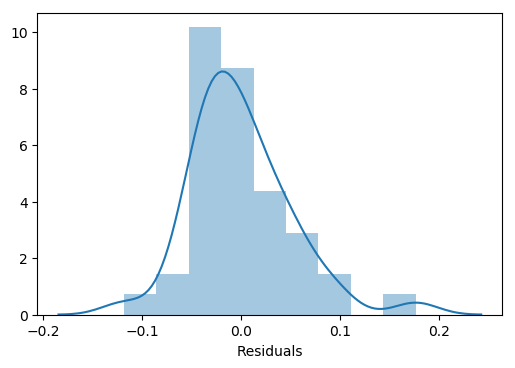

In [52]:
#plotting residuals
plt.figure(dpi=100)
sns.distplot(residuals)
plt.xlabel('Residuals')
plt.show()

Text(0, 0.5, 'Residuals')

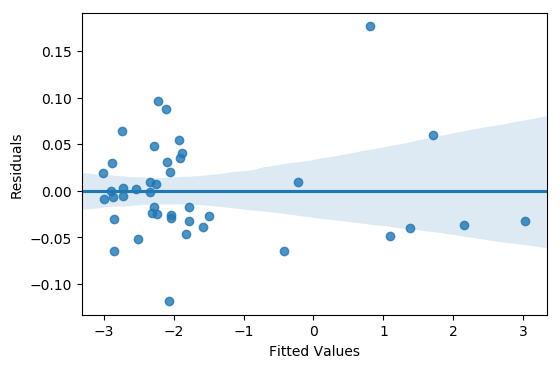

In [53]:
plt.figure(dpi=100)
sns.regplot(y_train_pred,residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

As we can see, the residuals are normally distributed and have a mean of zero which means that the model is good

# Making predictions

In [54]:
#creating X and y for test dataframe
y_test = df_test.pop('Agriculture_GDP')
X_test = df_test
X_test.head()

,Year,Area,Production,Yield,Rural_Population,Employment,Rainfall,Export_Value,India_GDP,Agriculture_perc_GDP,Credit_Disbursed_Perc,Credit_Disbursed_amount,Outstanding_Credit_Perc,Outstanding_Credit_amount,LokSabha_Elections,Arable_Land,Machinery,PubSB_NPA,PrivSB_NPA,Rainfall_deviation
0,-3.103448,-2.403468,-2.944590,-2.875776,3.040219,3.102676,-0.178518,-3.004292,-3.004174,2.608261,-3.500000,-3.019250,-3.00,-3.000000,-3.0,-3.000000,-1.307002,-3.000000,-3.000000,0.483871
5,-2.586207,-2.569942,-3.240111,-3.211180,2.722121,2.654636,-2.851772,-2.982833,-2.961452,2.278481,-2.666667,-2.971322,-2.40,-2.964966,-3.0,-1.143223,-2.951087,-3.000000,-3.000000,-2.806452
36,0.620690,0.371098,0.666308,0.867495,-0.213894,0.403236,0.183673,-2.241774,-2.329063,-0.817455,-2.166667,-2.705362,-1.44,-2.627261,3.0,1.005115,1.281005,-3.000000,-3.000000,0.870968
45,1.551724,-0.315607,0.952594,1.285714,-1.098720,-0.645924,0.511063,-1.788269,-1.518103,-2.376416,-0.166667,-1.883520,1.20,-1.547238,-3.0,-0.207161,-1.307002,1.235294,0.870968,1.064516
13,-1.758621,1.397688,-2.245806,-2.391304,2.042048,2.281269,0.655424,-2.932761,-2.912185,2.758161,-2.583333,-2.939108,-1.56,-2.872499,-3.0,1.020460,-2.556686,-3.000000,-3.000000,1.258065


In [55]:
X_train.columns

Index(['Year', 'Area', 'Production', 'Rural_Population', 'Employment',
       'Rainfall', 'Export_Value', 'India_GDP', 'Agriculture_perc_GDP',
       'Credit_Disbursed_Perc', 'Credit_Disbursed_amount',
       'Outstanding_Credit_Perc', 'Outstanding_Credit_amount',
       'LokSabha_Elections', 'Machinery'],
      dtype='object')

In [56]:
#predicting test values
X_test = X_test[X_train.columns]
X_test = sm.add_constant(X_test)
y_test_pred = lr_3.predict(X_test)


/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Model Evaluation

In [57]:
#importing necessary libraries and methods
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#calculating r2_score 
r2_score(y_test,y_test_pred)

0.9959549049169177

In [58]:
#calculating mean squared error for test set
mean_squared_error(y_test,y_test_pred)

0.01133403162375582

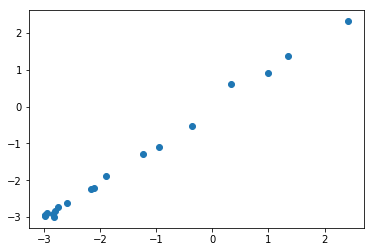

In [59]:
#scatterplot of y_test and y_test_pred
plt.scatter(y_test_pred,y_test)

We have linear relationship with high accuracy score and low mean squared error, so we can say that our model is good.

# Results

 Key Features affecting Agrigultural GDP from the model (based on p-value) :
        1. Rural Population of India
        2. Credit  amount Disbursed as Agricultural Loans
        3. Export Value of Agricultural Goods
   

# Model Building for Agriculture NPA

In [60]:
#creating X and y variables
y_train = df_train.pop('Outstanding_Credit_Perc')
X_train = df_train

In [61]:
print(X_train.shape)

(42, 14)


In [62]:
#feature selection using RFE
#In this case we are have 22 features , lets select 20 features from the data using RFE and then we will 
# remove statistical insignificant variables one by one

lr = LinearRegression()
lr.fit(X_train,y_train)

rfe = RFE(lr,10)
rfe.fit(X_train,y_train)

print(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
print('*'*100)
cols_rfe = X_train.columns[rfe.support_]
print('Features with RFE support:')
print(cols_rfe)
print('*'*100)
print('Features without RFE support:')
cols_not_rfe = X_train.columns[~rfe.support_]
print(cols_not_rfe)

[('Year', True, 1), ('Area', True, 1), ('Production', True, 1), ('Rural_Population', False, 3), ('Employment', True, 1), ('Rainfall', False, 2), ('Export_Value', False, 4), ('India_GDP', True, 1), ('Agriculture_perc_GDP', True, 1), ('Credit_Disbursed_Perc', True, 1), ('Credit_Disbursed_amount', True, 1), ('Outstanding_Credit_amount', True, 1), ('LokSabha_Elections', False, 5), ('Machinery', True, 1)]
****************************************************************************************************
Features with RFE support:
Index(['Year', 'Area', 'Production', 'Employment', 'India_GDP',
       'Agriculture_perc_GDP', 'Credit_Disbursed_Perc',
       'Credit_Disbursed_amount', 'Outstanding_Credit_amount', 'Machinery'],
      dtype='object')
****************************************************************************************************
Features without RFE support:
Index(['Rural_Population', 'Rainfall', 'Export_Value', 'LokSabha_Elections'], dtype='object')


In [63]:
#Building the first model
X_train_lr = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train,X_train_lr).fit()
print(lr_1.summary())
print(vif(X_train))

                               OLS Regression Results                              
Dep. Variable:     Outstanding_Credit_Perc   R-squared:                       0.992
Model:                                 OLS   Adj. R-squared:                  0.989
Method:                      Least Squares   F-statistic:                     253.2
Date:                     Sun, 17 May 2020   Prob (F-statistic):           7.15e-25
Time:                             19:38:29   Log-Likelihood:                 23.606
No. Observations:                       42   AIC:                            -17.21
Df Residuals:                           27   BIC:                             8.853
Df Model:                               14                                         
Covariance Type:                 nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [64]:
#removing features having p-value  and building 2nd model

X_train.drop('Rural_Population', axis=1, inplace=True)
X_train.drop('Export_Value', axis=1, inplace=True)



X_train_lr = sm.add_constant(X_train)
lr_2 = sm.OLS(y_train,X_train_lr).fit()
print(lr_2.summary())
print(vif(X_train))

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


                               OLS Regression Results                              
Dep. Variable:     Outstanding_Credit_Perc   R-squared:                       0.992
Model:                                 OLS   Adj. R-squared:                  0.989
Method:                      Least Squares   F-statistic:                     310.6
Date:                     Sun, 17 May 2020   Prob (F-statistic):           3.05e-27
Time:                             19:38:29   Log-Likelihood:                 23.163
No. Observations:                       42   AIC:                            -20.33
Df Residuals:                           29   BIC:                             2.263
Df Model:                               12                                         
Covariance Type:                 nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [65]:
#removing 'Outstanding_Credit_amount' feature as it is having high VIF building 3rd model
X_train.drop('Outstanding_Credit_amount', axis=1, inplace=True)
X_train_lr = sm.add_constant(X_train)
lr_3 = sm.OLS(y_train,X_train_lr).fit()
print(lr_3.summary())
print(vif(X_train))

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                               OLS Regression Results                              
Dep. Variable:     Outstanding_Credit_Perc   R-squared:                       0.980
Model:                                 OLS   Adj. R-squared:                  0.972
Method:                      Least Squares   F-statistic:                     131.8
Date:                     Sun, 17 May 2020   Prob (F-statistic):           2.92e-22
Time:                             19:38:30   Log-Likelihood:                 2.8892
No. Observations:                       42   AIC:                             18.22
Df Residuals:                           30   BIC:                             39.07
Df Model:                               11                                         
Covariance Type:                 nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

# Residual Analysis

In [66]:
#calculating residuals
y_train_pred = lr_3.predict(X_train_lr)
residuals = y_train-y_train_pred

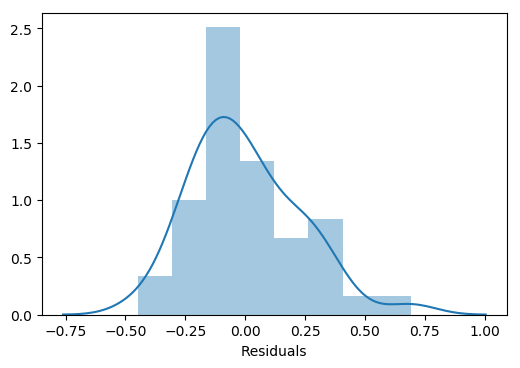

In [67]:
#plotting residuals
plt.figure(dpi=100)
sns.distplot(residuals)
plt.xlabel('Residuals')
plt.show()

Text(0, 0.5, 'Residuals')

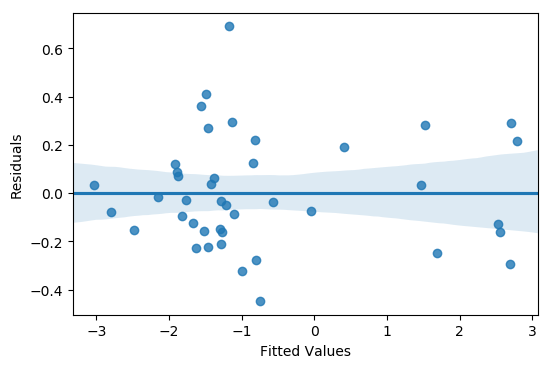

In [68]:
plt.figure(dpi=100)
sns.regplot(y_train_pred,residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

# Making predictions

In [69]:
#creating X and y for test dataframe
y_test = df_test.pop('Outstanding_Credit_Perc')
X_test = df_test
X_test.head()

,Year,Area,Production,Yield,Rural_Population,Employment,Rainfall,Export_Value,India_GDP,Agriculture_perc_GDP,Credit_Disbursed_Perc,Credit_Disbursed_amount,Outstanding_Credit_amount,LokSabha_Elections,Arable_Land,Machinery,PubSB_NPA,PrivSB_NPA,Rainfall_deviation
0,-3.103448,-2.403468,-2.944590,-2.875776,3.040219,3.102676,-0.178518,-3.004292,-3.004174,2.608261,-3.500000,-3.019250,-3.000000,-3.0,-3.000000,-1.307002,-3.000000,-3.000000,0.483871
5,-2.586207,-2.569942,-3.240111,-3.211180,2.722121,2.654636,-2.851772,-2.982833,-2.961452,2.278481,-2.666667,-2.971322,-2.964966,-3.0,-1.143223,-2.951087,-3.000000,-3.000000,-2.806452
36,0.620690,0.371098,0.666308,0.867495,-0.213894,0.403236,0.183673,-2.241774,-2.329063,-0.817455,-2.166667,-2.705362,-2.627261,3.0,1.005115,1.281005,-3.000000,-3.000000,0.870968
45,1.551724,-0.315607,0.952594,1.285714,-1.098720,-0.645924,0.511063,-1.788269,-1.518103,-2.376416,-0.166667,-1.883520,-1.547238,-3.0,-0.207161,-1.307002,1.235294,0.870968,1.064516
13,-1.758621,1.397688,-2.245806,-2.391304,2.042048,2.281269,0.655424,-2.932761,-2.912185,2.758161,-2.583333,-2.939108,-2.872499,-3.0,1.020460,-2.556686,-3.000000,-3.000000,1.258065


In [70]:
X_train.columns

Index(['Year', 'Area', 'Production', 'Employment', 'Rainfall', 'India_GDP',
       'Agriculture_perc_GDP', 'Credit_Disbursed_Perc',
       'Credit_Disbursed_amount', 'LokSabha_Elections', 'Machinery'],
      dtype='object')

In [71]:
#predicting test values
X_test = X_test[X_train.columns]
X_test = sm.add_constant(X_test)
y_test_pred = lr_3.predict(X_test)

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Model Evaluation

In [72]:
#importing necessary libraries and methods
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#calculating r2_score 
r2_score(y_test,y_test_pred)

0.9582189112891474

In [73]:
#calculating mean squared error for test set
mean_squared_error(y_test,y_test_pred)

0.13714642369337368

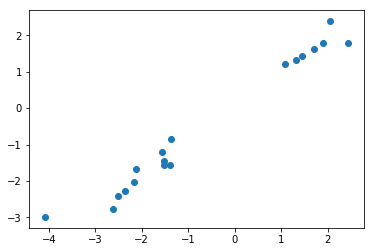

In [74]:
#scatterplot of y_test and y_test_pred
plt.scatter(y_test_pred,y_test)

We have almost linear relationship with high accuracy score and low mean squared error, so we can say that our model is good.

# Results

Key Features affecting Agrigultural NPA from the model (based on p-value) :
        1. Area of agricultutal land in India
        2. Production of Agricultural crops
        3. Employment rates
        4. Credit amount Disbursed as Agricultural Loans
       